(CONFIDENTIAL) INTERNAL USE ONLY, NOT FOR EXTERNAL DISTRIBUTION

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [5]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Hierachy Clustering

In [1]:
import sklearn as sk
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import gensim

%matplotlib inline

In [2]:
word2vec_fname = 'utils/GoogleNews-vectors-negative300-SLIM.bin.gz'

In [3]:
%time model = gensim.models.KeyedVectors.load_word2vec_format(fname=word2vec_fname, binary=True)

CPU times: user 23.9 s, sys: 1.12 s, total: 25 s
Wall time: 28.4 s


In [4]:
words = ["he", "she", "banana", "apple", "watermelon", "soccer", "football", "basketball", "data"]

In [6]:
model['he'].shape

(300,)

In [7]:
model.similarity("she", "he")

0.6129949174056142

In [9]:
embeddings = model[words]
print(embeddings.shape)

(9, 300)


## Dendrogram

In [8]:
from scipy.cluster import hierarchy
from matplotlib.pyplot import cm

In [53]:
def plot_dendrogram(words, color_threshold=0.6,
                    method='single', metric='cosine'):
    plt.figure(figsize=(10, 8))
    embeddings = model[words]
    z = hierarchy.linkage(embeddings, method=method, metric=metric)
    dn = hierarchy.dendrogram(
        z, labels=words, leaf_rotation=0,
        leaf_font_size=12, color_threshold=color_threshold,
        orientation='right', distance_sort='ascending'
    )
    plt.show()

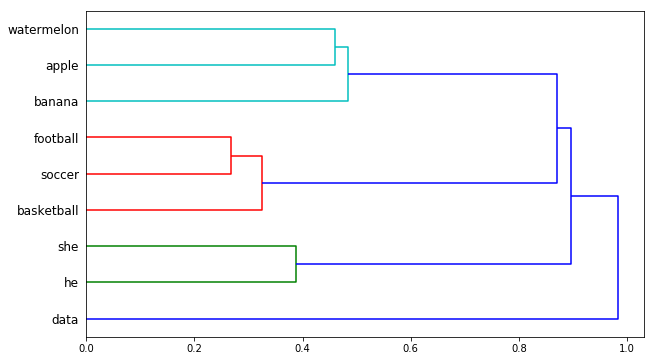

In [43]:
words = ["he", "she", "banana", "apple", "watermelon", "soccer", "football", "basketball", "data"]
plot_dendrogram(words, color_threshold=0.6, method='average')

## More examples

In [26]:
model.most_similar("car", topn=30)

[(u'vehicle', 0.7821096181869507),
 (u'cars', 0.7423831224441528),
 (u'SUV', 0.7160962820053101),
 (u'minivan', 0.6907036304473877),
 (u'truck', 0.6735790967941284),
 (u'Car', 0.667760968208313),
 (u'Jeep', 0.6511331796646118),
 (u'scooter', 0.638153076171875),
 (u'sedan', 0.6336701512336731),
 (u'motorcycle', 0.6256054639816284),
 (u'van', 0.6115672588348389),
 (u'Corvette', 0.6078191995620728),
 (u'Mercedes', 0.6063581705093384),
 (u'suv', 0.6054363250732422),
 (u'vehicles', 0.5998870730400085),
 (u'motorbike', 0.5921169519424438),
 (u'Camaro', 0.5906863808631897),
 (u'bike', 0.5854153633117676),
 (u'automobile', 0.5838367938995361),
 (u'BMW', 0.5806986689567566),
 (u'driver', 0.5779394507408142),
 (u'Chevrolet', 0.5706323385238647),
 (u'Lexus', 0.5684821009635925),
 (u'cruiser', 0.5670296549797058),
 (u'moped', 0.5647481679916382),
 (u'Camry', 0.5600202679634094),
 (u'Corsa', 0.551382303237915),
 (u'Acura', 0.5504179000854492),
 (u'Mazda', 0.5476574897766113),
 (u'Subaru', 0.5459358

In [27]:
car_words = [x[0] for x in model.most_similar("car", topn=30)]
print(car_words)

[u'vehicle', u'cars', u'SUV', u'minivan', u'truck', u'Car', u'Jeep', u'scooter', u'sedan', u'motorcycle', u'van', u'Corvette', u'Mercedes', u'suv', u'vehicles', u'motorbike', u'Camaro', u'bike', u'automobile', u'BMW', u'driver', u'Chevrolet', u'Lexus', u'cruiser', u'moped', u'Camry', u'Corsa', u'Acura', u'Mazda', u'Subaru']


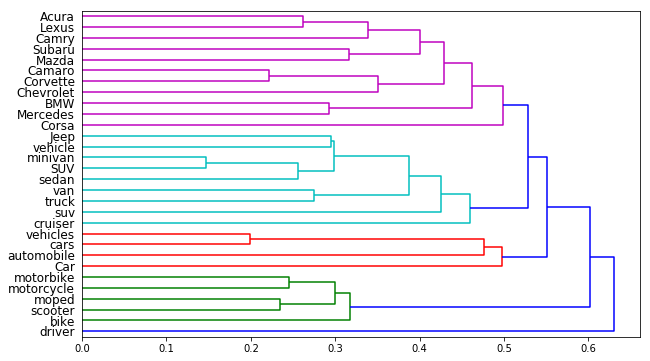

In [41]:
plot_dendrogram(car_words, color_threshold=0.5, method='average')

In [44]:
# Different categories
categories = ['car', 'football', 'milk', 'apple']

In [51]:
words_different_categories = []
for category in categories:
    words_per_category = model.most_similar(category, topn=10) # tuple (word, similarity score)
    words_different_categories += [x[0] for x in words_per_category]
np.random.shuffle(words_different_categories)    
print(words_different_categories)

[u'minivan', u'coaches', u'peach', u'basketball', u'Football', u'vehicle', u'butterfat', u'berry', u'bST', u'baseball', u'whey', u'dairies', u'gridiron', u'footballl', u'apples', u'SUV', u'pear', u'cars', u'fruit', u'sports', u'truck', u'pears', u'grape', u'potato', u'athletics', u'scooter', u'dairy', u'blueberry', u'Car', u'soymilk', u'soccer', u'Dairy', u'yogurt', u'motorcycle', u'strawberry', u'cereal', u'athletic', u'Jeep', u'Milk', u'sedan']


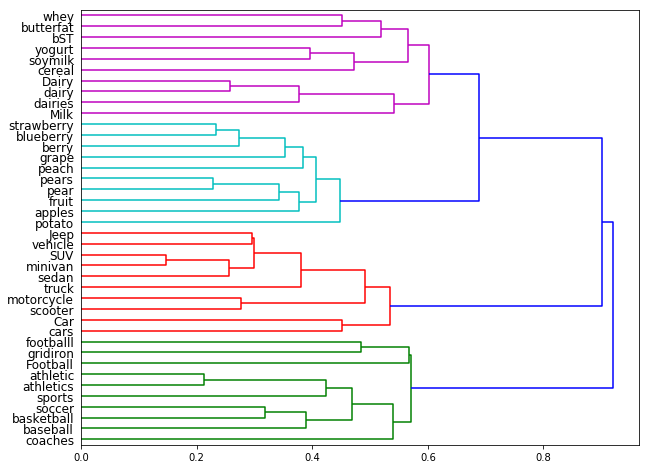

In [55]:
plot_dendrogram(words_different_categories, color_threshold=0.65, method='average')